In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import QuantumCircuit, assemble, Aer
sim = Aer.get_backend('aer_simulator')

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

# Lecture 2: A Single-Qubit System

References
1. [Introduction to Classical and Quantum Computing: Chapter 2](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf)

## Where Were We?

1. Last time: start of class.
2. Today: introduce a single-qubit system which encodes quantum information.
3. Next time: computations on a single-qubit system.

## Goal

1. Review some mathematical preliminaries including **complex numbers**.
2. Introduce a single **qubit** system which encodes quantum information. A qubit will be defined in terms of complex numbers.
3. Introduce idea of **superposition** and **measurement** and that stems from the underlying quantum representation.

## Mathematical Preliminaries

A qubit can be expressed as a pair of complex numbers. Thus, we will introduce
1. **complex numbers** (written $\mathbb{C}$) and
2. pairs of complex numbers (written $\mathbb{C}^2$)
in preparation to introduce the idea of a qubit.

### Complex Numbers

A complex number $z \in \mathbb{C}$ is a pair of real numbers $(a, b)$ typically written
$$
z = a + bj \,.
$$
1. The number $a$ is called the *real* component.
2. The number $b$ is called the *imaginary* component. The letter $j$ (or $i$ is notation of imaginary).

An imaginary number is defined to be
$$
j = \sqrt{-1} \,.
$$

You will more traditionally in mathematics see the notation
$$
i = \sqrt{-1} \,.
$$

#### Examples

In [3]:
z1 = 1 + 2j
z1, z1.real, z1.imag

((1+2j), 1.0, 2.0)

In [4]:
z2 = .3 - .2j
z2, z2.real, z2.imag

((0.3-0.2j), 0.3, -0.2)

In [5]:
z3 = -2.4 + 3.2j
z3, z3.real, z3.imag

((-2.4+3.2j), -2.4, 3.2)

In [6]:
z4 = -1.4 - 1.2j
z4, z4.real, z4.imag

((-1.4-1.2j), -1.4, -1.2)

In [7]:
z5 = 1 + 0j  # Non-imaginary
z5, z5.real, z5.imag

((1+0j), 1.0, 0.0)

In [8]:
z6 = 0 + 1j  # Fully-imaginary
z6, z6.real, z6.imag

(1j, 0.0, 1.0)

#### Imaginary Plane

A complex number can be represented as a point in the **complex plane**.

Text(0.5, 1.0, 'Imaginary Plane')

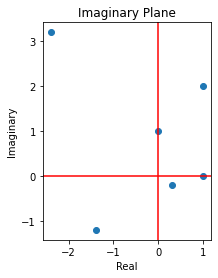

In [9]:
fig = plt.figure(); ax = fig.add_subplot()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

# Complex Numbers
zs = [z1, z2, z3, z4, z5, z6]
plt.plot([z.real for z in zs], [z.imag for z in zs], marker='o', linestyle='none')

# Plot meta-data
plt.axhline(y=0.0, color='r', linestyle='-'); plt.axvline(x=0.0, color='r', linestyle='-')
plt.xlabel('Real'); plt.ylabel('Imaginary'); plt.title('Imaginary Plane')

#### Arithmetic on complex numbers

We can perform operations on complex numbers:
1. Addition: $(a + bj) + (c + dj) = (a + c) + (b + d)j$.
2. Negation: $-(a + bj) = (-a) + (-b)j$.
3. Multiplication: $(a + bj) \cdot (c + dj) = (ac - bd) + (ad + bc)j$.
4. Inverse: $1/(a + bj) = a/(a^2 + b^2) + (-b/(a^2 + b^2))j$.

##### Test it Out

In [10]:
z1 = (1 + 2j)
z2 = (.3 - .2j)
z1 + z2, z1.real + z2.real + (z1.imag + z2.imag)*1j

((1.3+1.8j), (1.3+1.8j))

In [11]:
z1 = (1 + 2j)
-z1, -z1.real + (-z1.imag)*1j

((-1-2j), (-1-2j))

In [12]:
# Subtraction is addition of negation
z1 = (1 + 2j)
z2 = (.3 - .2j)
z1 - z2, z1.real - z2.real + (z1.imag - z2.imag)*1j

((0.7+2.2j), (0.7+2.2j))

In [13]:
z3 = -2.4 + 3.2j
z4 = -1.4 - 1.2j
z3 * z4

(7.199999999999999-1.5999999999999996j)

In [14]:
z2 = (.3 - .2j)
1 / z2

(2.3076923076923075+1.5384615384615385j)

#### Magnitude

The magnitude of a complex number is given by

$$
|a + bj| = \sqrt{a^2 + b^2} \,.
$$

In [15]:
z1 = (1 + 2j)
np.abs(z1), np.sqrt(z1.real**2 + z1.imag**2)

(2.23606797749979, 2.23606797749979)

In [16]:
z2 = (.3 - .2j)
np.abs(z2), np.sqrt(z2.real**2 + z2.imag**2)

(0.36055512754639896, 0.36055512754639896)

#### Complex Conjugation

The **complex conjugate** of a complex number is given by
$$
\overline{a + bj} = a - bj\,.
$$

In [17]:
z1 = (1 + 2j)
np.conjugate(z1)

(1-2j)

In [18]:
z2 = (.3 - .2j)
np.conjugate(z2)

(0.3+0.2j)

##### Geometric Intuition

1. Every operation on a complex number can be visualized in the complex plane.
2. For example, the complex conjugate of a number is a reflection over the real axis in the complex plane. Exercise: what is the geometric operation corresponding to negation?

Text(0.5, 1.0, 'Imaginary Plane')

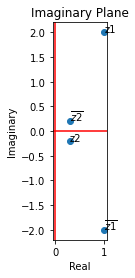

In [19]:
fig = plt.figure(); ax = fig.add_subplot()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

# Complex Numbers
zs = [z1, np.conjugate(z1), z2, np.conjugate(z2)]; txt = ["z1", "$\overline{z1}$", "z2", "$\overline{z2}$"]
plt.scatter([z.real for z in zs], [z.imag for z in zs])
for i, t in enumerate(txt):
    plt.annotate(t, (zs[i].real, zs[i].imag))

# Plot meta-data
plt.axhline(y=0.0, color='r', linestyle='-'); plt.axvline(x=0.0, color='r', linestyle='-')
plt.xlabel('Real'); plt.ylabel('Imaginary'); plt.title('Imaginary Plane')

### Pairs of Complex Numbers

We will now introduce pairs of complex numbers $\mathbb{C}^2$. We will write a pair of complex numbers using the notation
$$
\begin{pmatrix}
a \\
b \\
\end{pmatrix} \in \mathbb{C}^2
$$
where $a, b \in \mathbb{C}$ are complex numbers. We will see later that this is a **vector space**.

In [20]:
p1 = np.array([z1, z2])
z1, z2, p1

((1+2j), (0.3-0.2j), array([1. +2.j , 0.3-0.2j]))

In [21]:
p2 = np.array([z3, z4])
z3, z4, p2

((-2.4+3.2j), (-1.4-1.2j), array([-2.4+3.2j, -1.4-1.2j]))

#### Arithmetic on Complex Pairs

We can perform operations on pairs of complex number:
1. Addition: 
$$
\begin{pmatrix}
a \\
b 
\end{pmatrix} + 
\begin{pmatrix}
c \\
d 
\end{pmatrix} = \begin{pmatrix}
a + c \\
b + d
\end{pmatrix}
$$
2. Multiplication:
$$
r\begin{pmatrix}
a \\
b 
\end{pmatrix} = \begin{pmatrix}
ra \\
rb
\end{pmatrix}
$$
where $r \in \mathbb{C}$.

In [22]:
p1, p2, p1 + p2

(array([1. +2.j , 0.3-0.2j]),
 array([-2.4+3.2j, -1.4-1.2j]),
 array([-1.4+5.2j, -1.1-1.4j]))

In [23]:
p1, -1 * p1

(array([1. +2.j , 0.3-0.2j]), array([-1. -2.j , -0.3+0.2j]))

## A Qubit

A qubit is defined in terms of pairs of complex numbers

$$
|q\rangle = \{ \begin{pmatrix} a \\ b \end{pmatrix} \in \mathbb{C}^2, \sqrt{a\bar{a} + b\bar{b}} = 1\} \,.
$$

### Quantum analogues of zero and one bit

$$
|0\rangle = \begin{pmatrix}
1 \\
0 \\
\end{pmatrix}
$$
and 
$$
|1\rangle = \begin{pmatrix}
0 \\
1 \\
\end{pmatrix}
$$
are **qubits**.

In [24]:
def qubit_condition(q):
    return q[0]*np.conjugate(q[0]) + q[1]*np.conjugate(q[1])

zero = np.array([1.0 + 0j, 0j])  # 0 qubit
zero, qubit_condition(zero)

(array([1.+0.j, 0.+0.j]), (1+0j))

In [25]:
one = np.array([0j, 1.0 + 0j])   # 1 qubit
zero, qubit_condition(one)

(array([1.+0.j, 0.+0.j]), (1+0j))

### Other Qubits?

In [26]:
q = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
q, qubit_condition(q)

(array([0.70710678, 0.70710678]), 0.9999999999999998)

### Fact

Every qubit $|q\rangle$ can be written as
$$
|q\rangle = \alpha|0\rangle + \beta |1\rangle
$$
where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$.

In [27]:
q_p = 1/np.sqrt(2)*zero + 1/np.sqrt(2)*one
q, q_p

(array([0.70710678, 0.70710678]), array([0.70710678+0.j, 0.70710678+0.j]))

In [28]:
q2 = np.sqrt(1/3)*zero + np.sqrt(2/3)*one
q2, qubit_condition(q2)

(array([0.57735027+0.j, 0.81649658+0.j]), (1+0j))

In [29]:
q3 = np.sqrt(-1/3*1j)*zero + np.sqrt(2/3*1j)*one
q3, qubit_condition(q2)

(array([0.40824829-0.40824829j, 0.57735027+0.57735027j]), (1+0j))

### Quantum Concept: Superposition

1. The qubits above are not a zero or a one.
2. Instead, they are said to be in a **superposition** of zero and one.
3. In this way, we can say that a qubit carries different information from a single classical bit.
4. However, what do these amplitudes mean?

### Quantum Concept: Measurement

1. In order to observe a qubit, we must **measure** it.
2. Measurement is an operation that destroys superposition and returns either $|0\rangle$ or $|1\rangle$.
3. The probability of obtaining $|0\rangle$ or $|1\rangle$ is given by **Born's rule**, which states that we obtain
  - $|0\rangle$ with probability $|\alpha|^2$ and
  - $|1\rangle$ with probability $|\beta|^2$.

This is why we require that $|\alpha\rangle^2 + |\beta\rangle^2 = 1$.

[0.70710678 0.70710678]


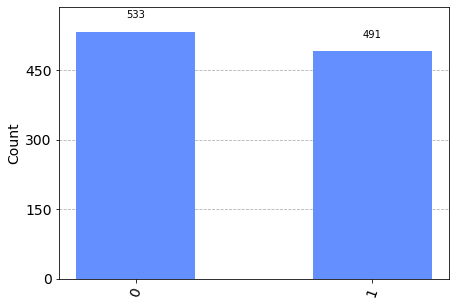

In [30]:
def demonstrate_measure(q):
    # Don't worry about this code for now
    qc = QuantumCircuit(1, 1)
    qc.initialize(q, 0)        
    qc.measure(0, 0)
    qobj = assemble(qc)
    results = sim.run(qobj, shots=1024).result()
    answer = results.get_counts()
    return plot_histogram(answer)

print(q)
demonstrate_measure(q)

[0.57735027+0.j 0.81649658+0.j]


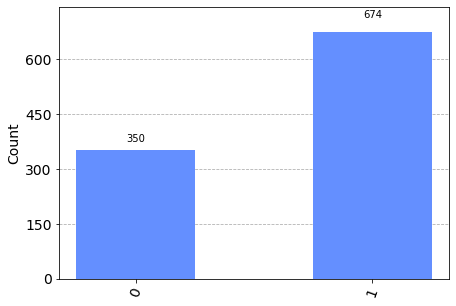

In [31]:
print(q2)
demonstrate_measure(q2)

[0.40824829-0.40824829j 0.57735027+0.57735027j]


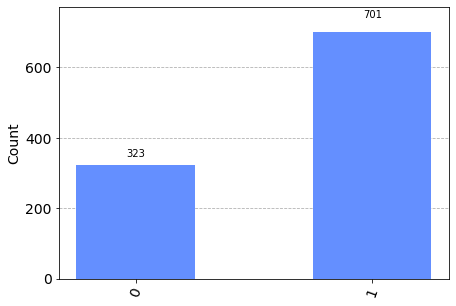

In [34]:
print(q3)
demonstrate_measure(q3)

## Summary

1. We looked at single-qubit systems. Qubits are the classical analogue of bits.
2. Unlike a classical bit, a qubit can be in a superposition of states.
3. To observe the state of a qubit, we must measure it, which stochastically produces a classical result.
4. Next time we'll look at operations on a single qubit.